In [1]:
!pip install finance-datareader

- 상단 볼린저 밴드 = 중간볼린저 밴드 + 2 * 표준편차
- 중간 볼린저 밴드 = 종가의 20일 이동평균
- 하단 볼린저 밴드 = 중간볼린저 밴드 - 2 * 표준편차

In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [14]:
bitcoin = fdr.DataReader('BTC/KRW', '2020')
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,2.144279e+13
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,2.407384e+13
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,3.277405e+13
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,2.150344e+13
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13


In [15]:
bitcoin['MA20'] = bitcoin['Close'].rolling(20, min_periods = 1).mean()

In [ ]:
# 상단 볼린저 밴드 = 중간볼린저 밴드 + 2 * 표준편차 --> upper
# 하단 볼린저 밴드 = 중간볼린저 밴드 - 2 * 표준편차 --> lower

In [16]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20
Date,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,2.144279e+13,8315985.50
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,2.407384e+13,8200065.00
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,3.277405e+13,8321079.00
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,2.150344e+13,8400756.25
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13,8448842.60


In [8]:
# bitcoin['MA20'] + bitcoin['Close'].std() * 2 >> 이렇게 하면 안되는 이유? close의 std도 rolling..표준편차의 이동평균을 구해주고 얘랑 연산해줘야 함!/ 안그러면 다 동일한 편차를 써줘서 동일한 폭.. 그때그때 변동된 사항이 반영이 안됨!

,Open,High,Low,Close,Adj Close,Volume,MA20,upper,lower
Date,,,,,,,,,
2016-01-01,506092.87500,512567.25000,502287.40625,510103.59375,510103.59375,4.260775e+10,510103.593750,NaN,NaN
2016-01-02,510441.81250,512133.03125,507209.71875,509051.25000,509051.25000,3.534695e+10,509577.421875,NaN,NaN
2016-01-03,509215.68750,509409.46875,498978.56250,505155.40625,505155.40625,4.655981e+10,508103.416667,NaN,NaN
2016-01-04,505214.15625,517275.09375,505932.96875,514646.37500,514646.37500,4.572320e+10,509739.156250,NaN,NaN
2016-01-05,514620.21875,514809.59375,510081.25000,513928.71875,513928.71875,4.107361e+10,510577.068750,NaN,NaN


In [17]:
bitcoin['std'] = bitcoin['Close'].rolling(20, min_periods = 1).std()

In [18]:
bitcoin['upper'] = bitcoin['MA20'] + bitcoin['std'] * 2
bitcoin['lower'] = bitcoin['MA20'] - bitcoin['std'] * 2
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower
Date,,,,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,2.144279e+13,8315985.50,NaN,NaN,NaN
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,2.407384e+13,8200065.00,163936.343257,8.527938e+06,7.872192e+06
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,3.277405e+13,8321079.00,239521.871461,8.800123e+06,7.842035e+06
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,2.150344e+13,8400756.25,252271.694691,8.905300e+06,7.896213e+06
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13,8448842.60,243499.982009,8.935843e+06,7.961843e+06


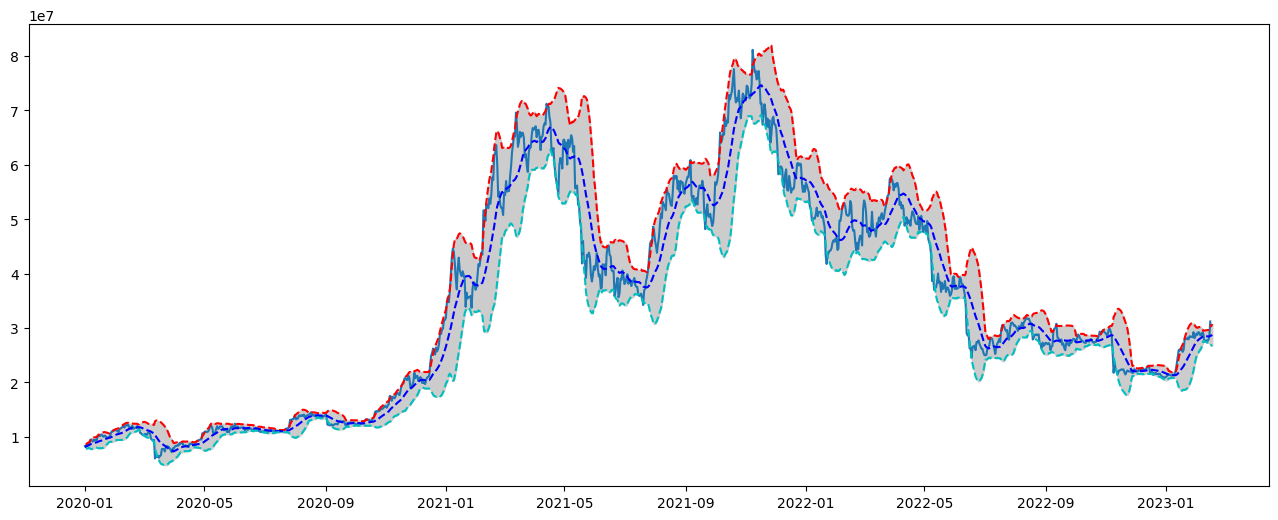

In [19]:
plt.figure(figsize=(16,6))
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'b--')
plt.plot(bitcoin.index, bitcoin['lower'], 'c--')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')
plt.show()

In [20]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower
Date,,,,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,2.144279e+13,8315985.50,NaN,NaN,NaN
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,2.407384e+13,8200065.00,163936.343257,8.527938e+06,7.872192e+06
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,3.277405e+13,8321079.00,239521.871461,8.800123e+06,7.842035e+06
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,2.150344e+13,8400756.25,252271.694691,8.905300e+06,7.896213e+06
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13,8448842.60,243499.982009,8.935843e+06,7.961843e+06


<AxesSubplot: xlabel='Date'>

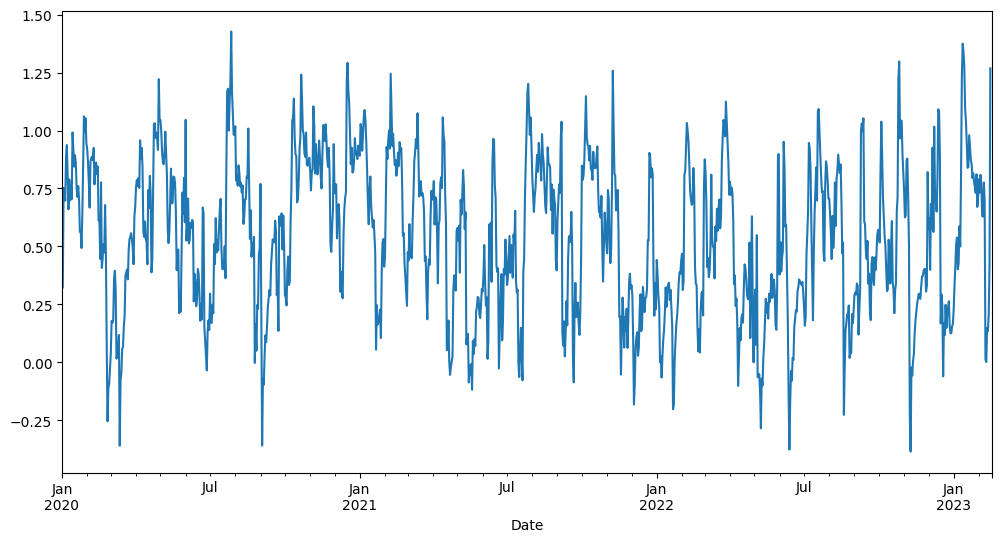

In [21]:
# 현재 종가가 저점대비 어느 위치, 어느쯤에 위치했나..?
bitcoin['%b'] = (bitcoin['Close'] - bitcoin['lower']) / (bitcoin['upper'] - bitcoin['lower'])
bitcoin['%b'].plot(figsize=(12,6))

<AxesSubplot: xlabel='Date'>

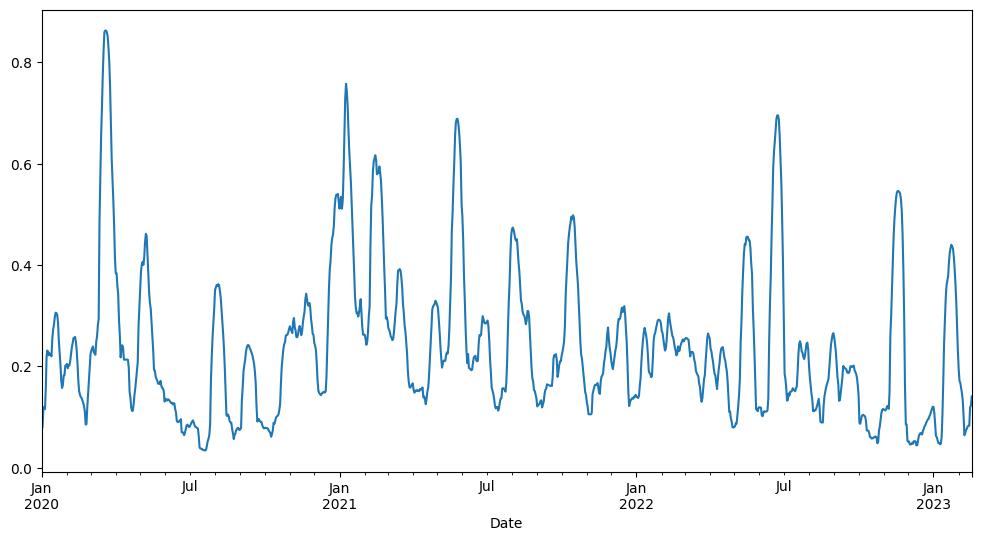

In [22]:
bitcoin['bandwidth'] = (bitcoin['upper'] - bitcoin['lower']) / bitcoin['MA20']
bitcoin['bandwidth'].plot(figsize=(12,6))

In [ ]:
# bandwidth 크다 -> 변동성이 크다
# bandwidth 작다 -> 변동성이 작다
# (변동성이 커졌다 -> 작아졌다) -> 추세가 바뀌었다

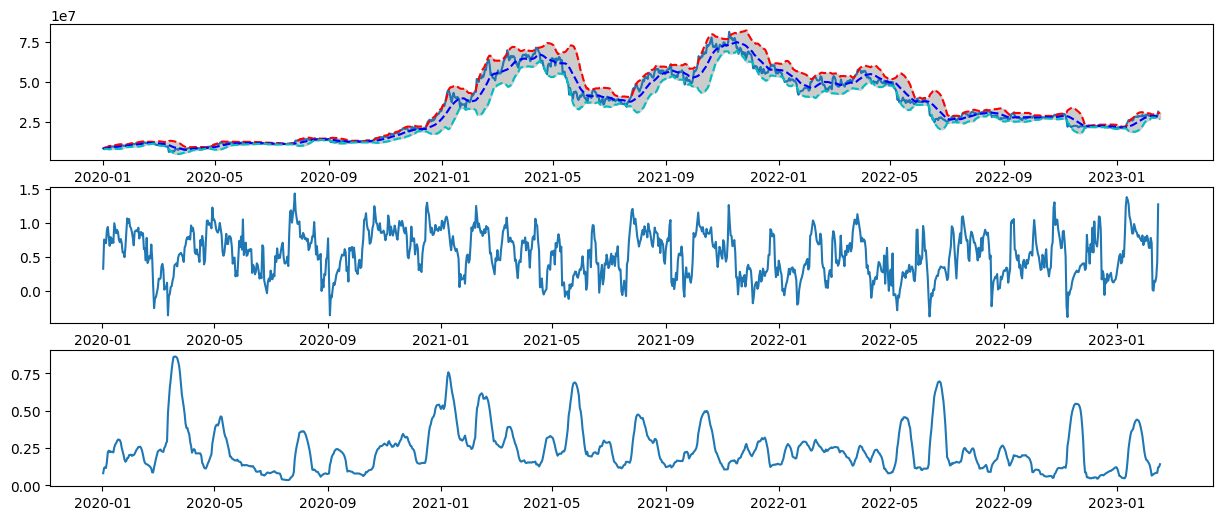

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(3,1,1)
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'b--')
plt.plot(bitcoin.index, bitcoin['lower'], 'c--')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')

plt.subplot(3,1,2)
plt.plot(bitcoin.index, bitcoin['%b'])

plt.subplot(3,1,3)
plt.plot(bitcoin.index, bitcoin['bandwidth'])

In [29]:
# 볼린저 밴드, %b, bandwidth를 활용하여 매수매도 의견 내기
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower,%b,bandwidth
Date,,,,,,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,2.144279e+13,8315985.50,NaN,NaN,NaN,NaN,NaN
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,2.407384e+13,8200065.00,163936.343257,8.527938e+06,7.872192e+06,0.323223,0.079968
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,3.277405e+13,8321079.00,239521.871461,8.800123e+06,7.842035e+06,0.752616,0.115140
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,2.150344e+13,8400756.25,252271.694691,8.905300e+06,7.896213e+06,0.736879,0.120119
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13,8448842.60,243499.982009,8.935843e+06,7.961843e+06,0.697480,0.115282


In [31]:
bitcoin['%b'].describe() # 일단 얘 기준으로 해보자 25%         0.288838(얘보다 낮으면 '가격이 싸다' 라고 생각하는거임)

count    1142.000000
mean        0.541250
std         0.328665
min        -0.384963
25%         0.288838
50%         0.546282
75%         0.808385
max         1.427295
Name: %b, dtype: float64

In [32]:
buy_cond1 = bitcoin['%b'] < 0.288838
sell_cond1 = bitcoin['%b'] < 0.80

In [33]:
BUY_DATE = bitcoin[buy_cond1].index # 가격 저렴하니까 사라고 하는 위치
SELL_DATE = bitcoin[sell_cond1].index

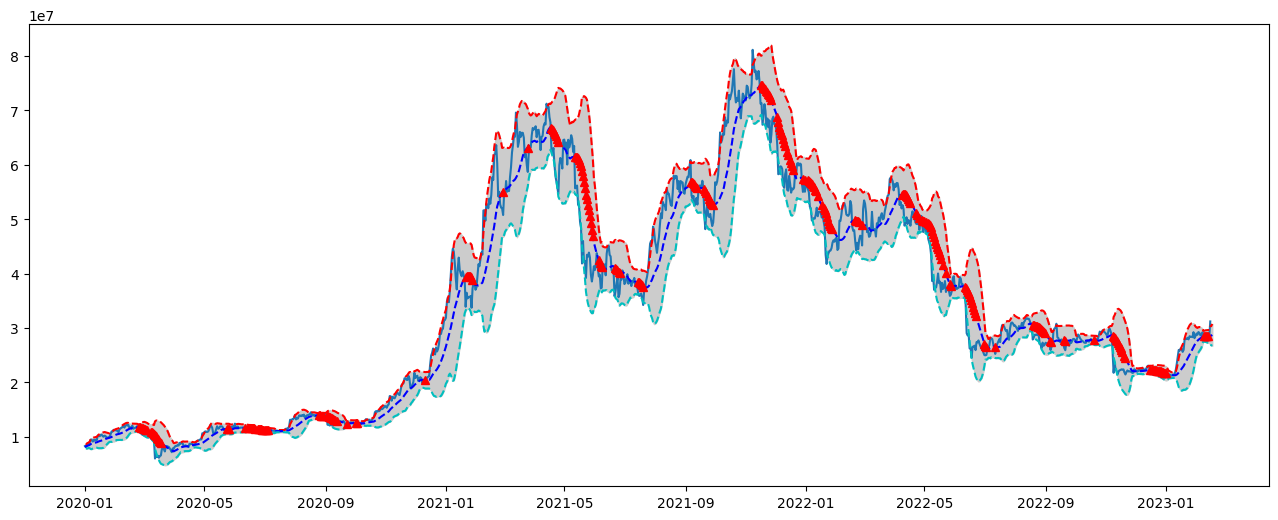

In [37]:
plt.figure(figsize=(16,6))
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'b--')
plt.plot(bitcoin.index, bitcoin['lower'], 'c--')
plt.plot(BUY_DATE, bitcoin.loc[BUY_DATE, 'MA20'], 'r^')
# plt.plot(SELL_DATE, bitcoin.loc[SELL_DATE, 'MA20'], 'bv')

plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')
plt.show()

In [38]:
bitcoin['bandwidth'].describe()

count    1143.000000
mean        0.239785
std         0.150834
min         0.033746
25%         0.134663
50%         0.211843
75%         0.291745
max         0.862620
Name: bandwidth, dtype: float64

In [39]:
buy_cond2 = bitcoin['bandwidth'] < 0.291745
# sell_cond2 = bitcoin['%b'] < 0.80

In [45]:
BUY_DATE = bitcoin[buy_cond1 & buy_cond2].index
SELL_DATE = bitcoin[sell_cond1].index

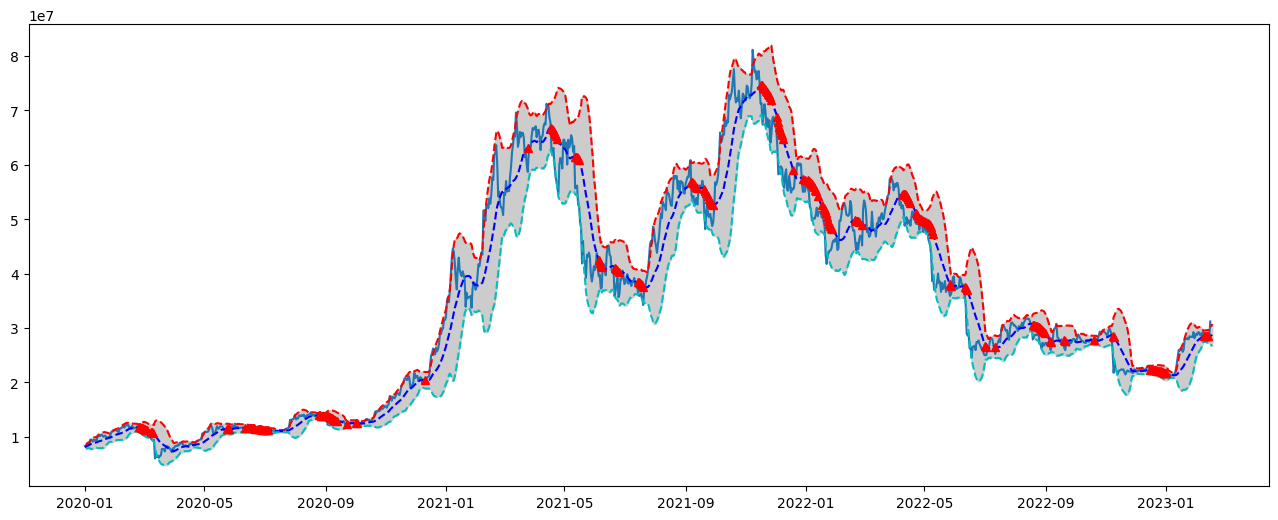

In [46]:
plt.figure(figsize=(16,6))
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'b--')
plt.plot(bitcoin.index, bitcoin['lower'], 'c--')
plt.plot(BUY_DATE, bitcoin.loc[BUY_DATE, 'MA20'], 'r^')
# plt.plot(SELL_DATE, bitcoin.loc[SELL_DATE, 'MA20'], 'bv')

plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')
plt.show()

## MFI
- MF(money flow) = 거래량 X (고가 + 종가 + 저가)/3
- MFR = 양의 MF/음의 MF
- MFI = 100 -(100/(1 + MFR))

In [47]:
bitcoin['MF'] = bitcoin['Volume'] * (bitcoin['High'] + bitcoin['Low'] + bitcoin['Close'])/3
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower,%b,bandwidth,MF
Date,,,,,,,,,,,,,
2020-01-01,8308229.5,8376938.5,8287634.5,8315985.5,8315985.5,2.144279e+13,8315985.50,NaN,NaN,NaN,NaN,NaN,1.785509e+20
2020-01-02,8318730.5,8335989.5,8026049.5,8084144.5,8084144.5,2.407384e+13,8200065.00,163936.343257,8.527938e+06,7.872192e+06,0.323223,0.079968,1.961711e+20
2020-01-03,8082939.5,8638980.0,8022294.0,8563107.0,8563107.0,3.277405e+13,8321079.00,239521.871461,8.800123e+06,7.842035e+06,0.752616,0.115140,2.755684e+20
2020-01-04,8563679.0,8659292.0,8521870.0,8639788.0,8639788.0,2.150344e+13,8400756.25,252271.694691,8.905300e+06,7.896213e+06,0.736879,0.120119,1.850797e+20
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13,8448842.60,243499.982009,8.935843e+06,7.961843e+06,0.697480,0.115282,1.998222e+20


In [49]:
import numpy as np
bitcoin['SELL_MF'] = np.where(bitcoin['Open'] > bitcoin['Close'], bitcoin['MF'], 0)
bitcoin['BUY_MF'] = np.where(bitcoin['Open'] <= bitcoin['Close'], bitcoin['MF'], 0)

In [50]:
# 양/음 MF
print(bitcoin['SELL_MF'].sum())
print(bitcoin['BUY_MF'].sum())
print(bitcoin['SELL_MF'].sum() + bitcoin['BUY_MF'].sum())
print(bitcoin['MF'].sum())

9.006384171645311e+23
8.797566269423193e+23
1.7803950441068506e+24
1.7803950441068506e+24


In [53]:
# MFR
bitcoin['MFR'] = bitcoin['BUY_MF'].rolling(20, min_periods = 5).sum() / bitcoin['SELL_MF'].rolling(20, min_periods = 5).sum()
bitcoin = bitcoin.dropna(axis = 0, subset = ['SELL_MF', 'MFR'])

In [54]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,std,upper,lower,%b,bandwidth,MF,SELL_MF,BUY_MF,MFR
Date,,,,,,,,,,,,,,,,
2020-01-05,8639549.0,8795827.0,8628617.0,8641188.0,8641188.0,2.299835e+13,8.448843e+06,243499.982009,8.935843e+06,7.961843e+06,0.697480,0.115282,1.998222e+20,0.000000e+00,1.998222e+20,4.276986
2020-01-06,8640180.0,9083929.0,8638828.0,9069786.0,9069786.0,2.717271e+13,8.552333e+06,334208.882773,9.220751e+06,7.883915e+06,0.887073,0.156312,2.426753e+20,0.000000e+00,2.426753e+20,5.514046
2020-01-07,9069159.0,9547740.0,9068629.0,9530784.0,9530784.0,3.358466e+13,8.692112e+06,479422.802909,9.650957e+06,7.733266e+06,0.937334,0.220624,3.151042e+20,0.000000e+00,3.151042e+20,7.120318
2020-01-08,9528733.0,9809657.0,9240281.0,9385084.0,9385084.0,3.678894e+13,8.778733e+06,506988.508693,9.792710e+06,7.764756e+06,0.798996,0.231008,3.486981e+20,3.486981e+20,0.000000e+00,2.563552
2020-01-09,9387910.0,9387910.0,9097345.0,9130347.0,9130347.0,2.786473e+13,8.817802e+06,488512.624238,9.794827e+06,7.840776e+06,0.659947,0.221603,2.565005e+20,2.565005e+20,0.000000e+00,1.743017


In [55]:
# MFI = 100 -(100/(1 + MFR))
bitcoin['MFI'] = 100 - (100 / (1 + bitcoin['MFR']))

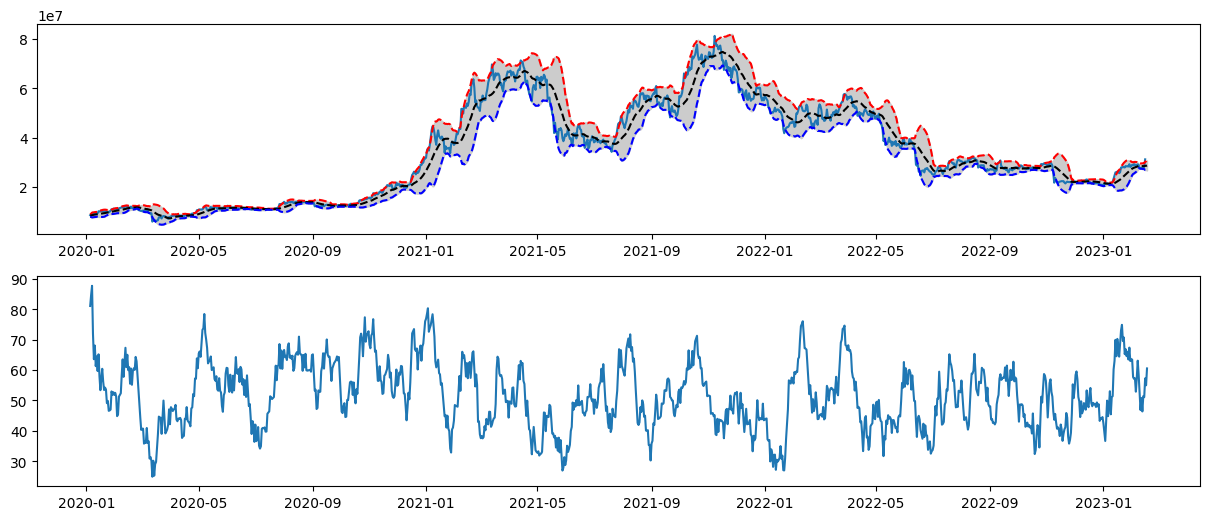

In [56]:
plt.figure(figsize = (15,6))
plt.subplot(2,1,1)
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
# plt.plot(BUY_DATE, bitcoin.loc[BUY_DATE, 'MA20'], 'r^')
# plt.plot(SELL_DATE, bitcoin.loc[SELL_DATE, 'MA20'], 'bv')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')

plt.subplot(2,1,2)
plt.plot(bitcoin.index, bitcoin['MFI'])

In [62]:
# buy, sell cutline > 이건 숫자가 동적으로 바뀔 수 있으니
buy_cut = 70
sell_cut = 35
buy_index = bitcoin[bitcoin['MFI'] > buy_cut].index
sell_index = bitcoin[bitcoin['MFI'] > sell_cut].index

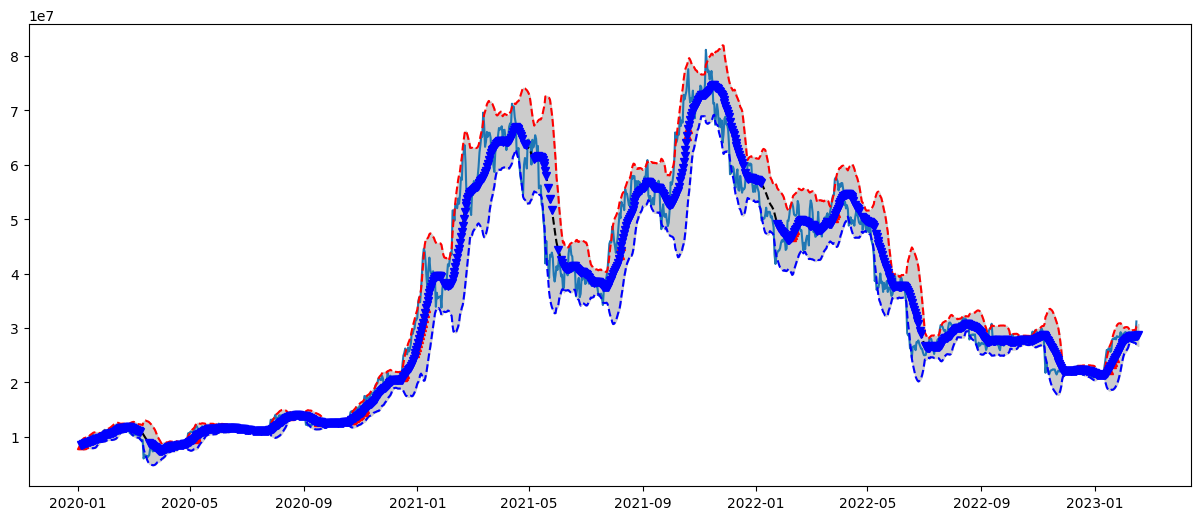

In [64]:
plt.figure(figsize = (15,6))
plt.plot(bitcoin.index, bitcoin['Close'])
plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
plt.plot(buy_index, bitcoin.loc[buy_index, 'MA20'], 'r^')
plt.plot(sell_index, bitcoin.loc[sell_index, 'MA20'], 'bv')
plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')

In [ ]:
# 왜그래프가 이상하지!!!!!!!!!!!!!!!!!!!!!!2개정도..

In [65]:
def MFI_trading(ticker, start_year, mfi_low, mfi_high):
  bitcoin = fdr.DataReader(ticker, start_year)
  bitcoin['std'] = bitcoin['Close'].rolling(20, min_periods = 1).std()
  bitcoin['MA20'] = bitcoin['Close'].rolling(20, min_periods = 1).mean()
  bitcoin['upper'] = bitcoin['MA20'] + bitcoin['std'] * 2
  bitcoin['lower'] = bitcoin['MA20'] - bitcoin['std'] * 2
  bitcoin['MF'] = bitcoin['Volume'] * (bitcoin['High'] + bitcoin['Low'] + bitcoin['Close'])/3
  bitcoin['SELL_MF'] = np.where(bitcoin['Open'] > bitcoin['Close'], bitcoin['MF'], 0)
  bitcoin['BUY_MF'] = np.where(bitcoin['Open'] <= bitcoin['Close'], bitcoin['MF'], 0)
  bitcoin['MFR'] = bitcoin['BUY_MF'].rolling(20, min_periods = 5).sum() / bitcoin['SELL_MF'].rolling(20, min_periods = 5).sum()
  bitcoin = bitcoin.dropna(axis = 0, subset = ['SELL_MF', 'MFR'])
  bitcoin['MFI'] = 100 - (100/ (1 + bitcoin['MFR']))
  buy_cut = mfi_high
  sell_cut = mfi_low
  buy_index = bitcoin[bitcoin['MFI'] > buy_cut].index
  sell_index = bitcoin[bitcoin['MFI'] <= sell_cut].index

  plt.figure(figsize = (15,6))
  plt.plot(bitcoin.index, bitcoin['Close'])
  plt.plot(bitcoin.index, bitcoin['upper'], 'r--')
  plt.plot(bitcoin.index, bitcoin['MA20'], 'k--')
  plt.plot(bitcoin.index, bitcoin['lower'], 'b--')
  plt.plot(buy_index, bitcoin.loc[buy_index, 'MA20'], 'r^')
  plt.plot(sell_index, bitcoin.loc[sell_index, 'MA20'], 'bv')
  plt.fill_between(bitcoin.index, bitcoin['upper'], bitcoin['lower'], color = '0.8')

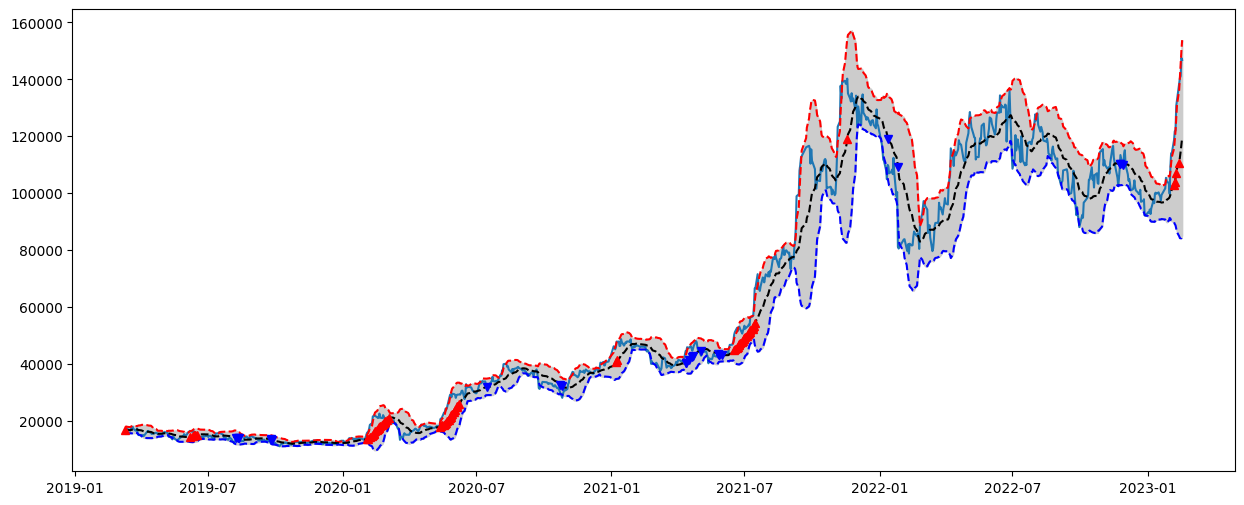

In [66]:
MFI_trading('247540', '2019', 30, 70)